In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

['NanumGothic']


In [3]:
df = pd.read_csv("../nationalhealth_2010to2021.csv")
m_data = pd.read_excel("../pandapear/data/meta_data20.xlsx")

def trans(val): #변수 번역 input str
        return m_data["variable description"][m_data["variable"] == val].values[0]

def disc(val): #설문 내역
        return m_data["option description"][m_data["variable"] == val].values[0]
        
def change2None(data): #통계량을 측정할 때, 결측값 복원
    for i in data.columns:
        data.replace({i:{-1:None}},inplace = True)
        data.replace({i:{-2:None}},inplace = True)
    return data


#타겟 + 피쳐 str list
col_li = df.columns.to_list() 
#타겟 str list
target_li = df.columns[-13:].to_list()
#피쳐 str list
fea_li = df.columns[:-13].to_list()

#범주형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "category"].values)
cat_li = [i for i in temp if i in col_li] #범주형 자료 컬럼 : cat_li
#연속형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "numeric"].values)
expcept = ['ID', 'ID_fam', 'LW_mt_a1', 'age', 'year']
num_li = [i for i in temp if i in col_li] #연속형 자료 컬럼 : num_li

In [7]:
trans('region')

'17개 시도'

In [12]:
len(num_li)

42

In [10]:
len(cat_li)

62

# 성민이의 부탁
1. numerical 데이터들만 가지고 데이터프레임 만들어주기 
2. 그 데이터프레임으로 Feature importances진행하기

## numerical한 데이터로 데이터프레임 만들기
- df_numeric

## df_numeric으로 FI진행하기

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from eli5.sklearn import PermutationImportance

In [19]:
features = num_li
target = ['비만', '고혈압', '당뇨병', '고콜레스테롤혈증', '고중성지방혈증', 
          'B형간염', '빈혈', '뇌졸중', '협심증또는심근경색증', '천식', '아토피피부염', '골관절염', '우울증']

In [ ]:
df_numeric = df[features + target]

In [46]:
df_numeric.to_csv('df_numeric.csv')

In [26]:
def rf_fe_importance(data, target_name, num):
    '''
    랜덤포레스트로 변수중요도 구하기
        target_name : 변수이름
        num : 상위n개 변수 뽑기
    '''

    X = data[features]
    y = data[target_name]

    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,test_size=0.1, random_state=42)

    model = RandomForestClassifier(n_estimators=5, random_state=0)
    model.fit(X_train, y_train)

    predict = model.predict(X_test)
    df = pd.DataFrame(model.feature_importances_, index = features)[:num].sort_values(0, ascending=False)
    return df

In [28]:
## dic_fe_impo봐보기

dic_fe_impo = {}

for ii in target :
    dic_fe_impo[ii] = rf_fe_importance(df_numeric, ii,30)

In [49]:
def visualization(target_name):   
    plt.figure(figsize=(30, 30))
    dic_fe_impo[target_name].plot(kind='bar')
    _=plt.xticks(rotation=90)
    _=plt.legend([target_name])
    _=plt.title(target_name)

In [48]:
len(target)

13

C:\Users\jihoo\AppData\Local\Temp\ipykernel_17508\3164935217.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30, 30))


<Figure size 3000x3000 with 0 Axes>

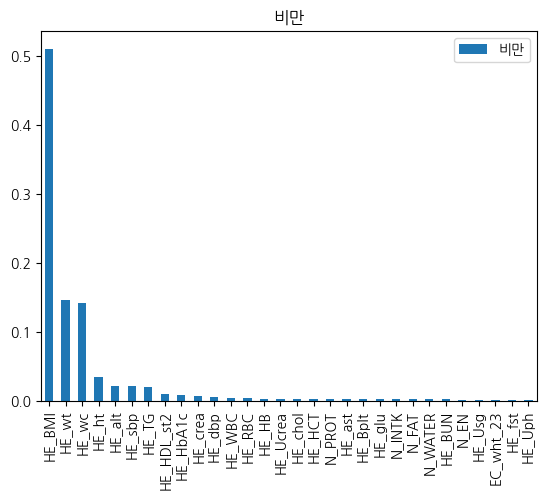

<Figure size 3000x3000 with 0 Axes>

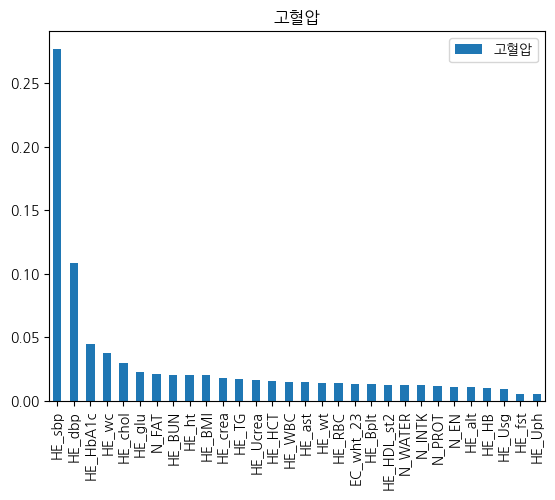

<Figure size 3000x3000 with 0 Axes>

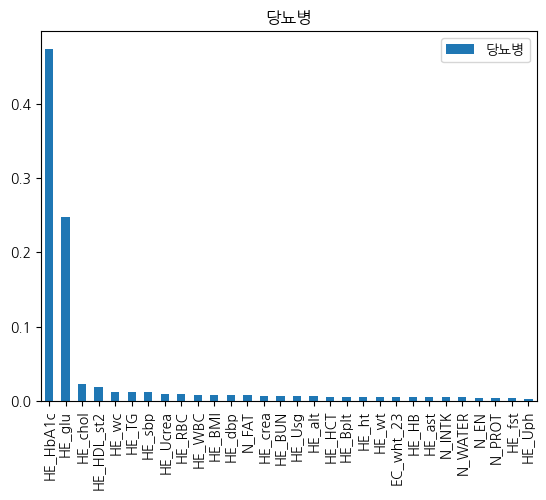

<Figure size 3000x3000 with 0 Axes>

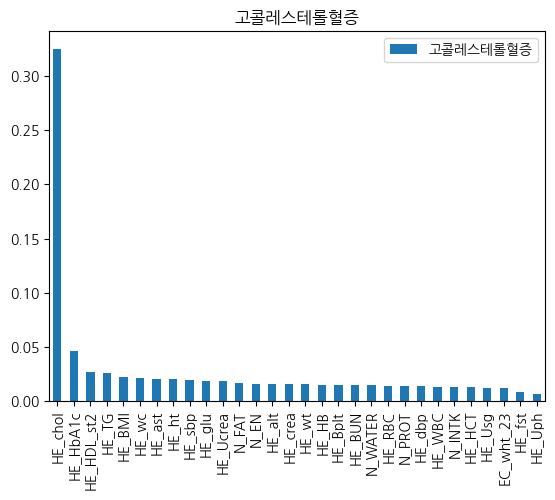

<Figure size 3000x3000 with 0 Axes>

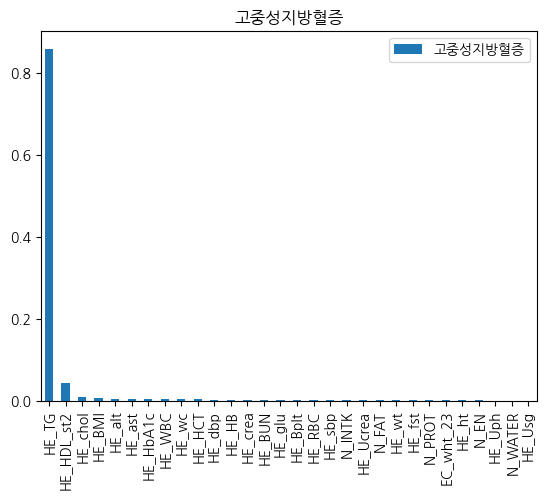

<Figure size 3000x3000 with 0 Axes>

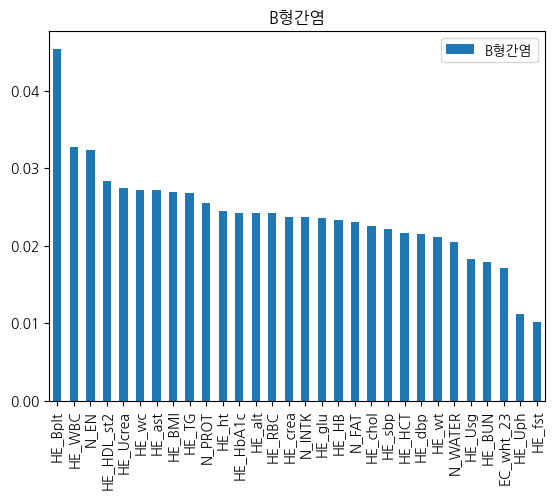

<Figure size 3000x3000 with 0 Axes>

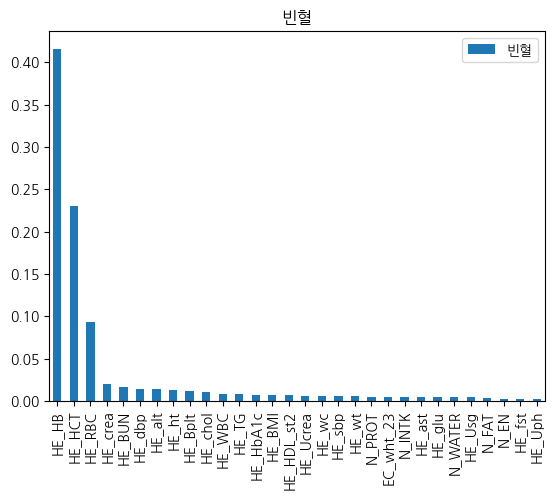

<Figure size 3000x3000 with 0 Axes>

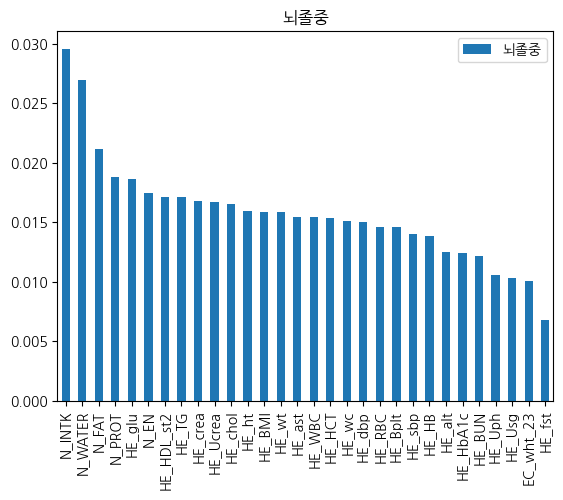

<Figure size 3000x3000 with 0 Axes>

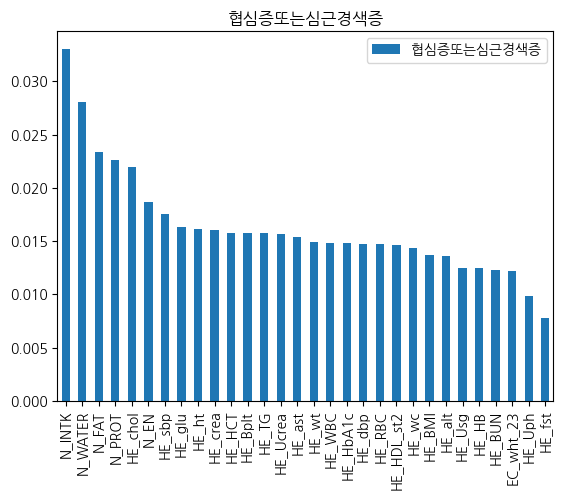

<Figure size 3000x3000 with 0 Axes>

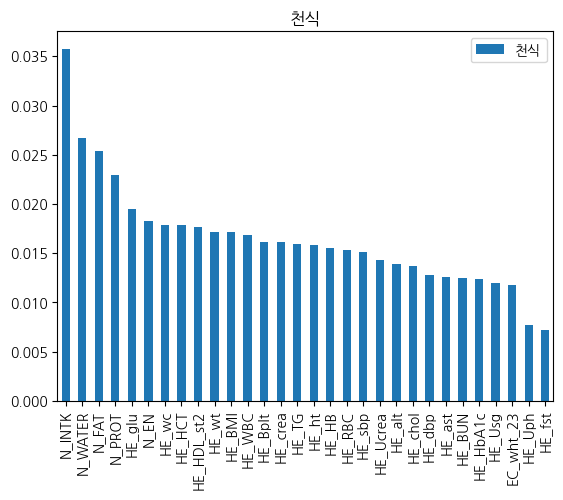

<Figure size 3000x3000 with 0 Axes>

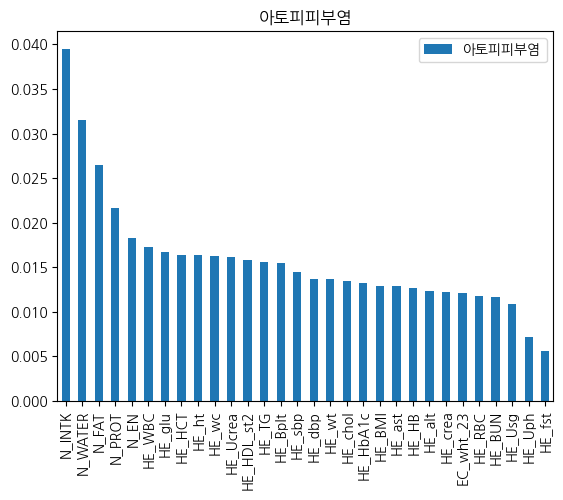

<Figure size 3000x3000 with 0 Axes>

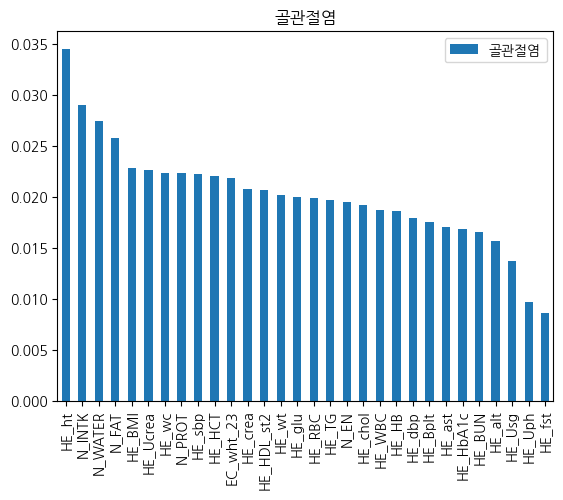

<Figure size 3000x3000 with 0 Axes>

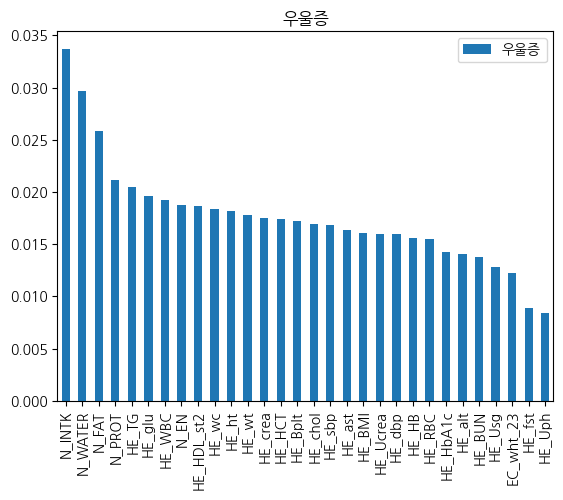

In [42]:


for ii in target :
    visualization(ii)

비만
               0
HE_BMI  0.510320
HE_wt   0.145705
HE_wc   0.141818
비만 = ['HE_BMI', 'HE_wt', 'HE_wc']
고혈압
                 0
HE_sbp    0.277152
HE_dbp    0.108277
HE_HbA1c  0.044562
고혈압 = ['HE_sbp', 'HE_dbp', 'HE_HbA1c']
당뇨병
                 0
HE_HbA1c  0.473927
HE_glu    0.247949
HE_chol   0.022419
당뇨병 = ['HE_HbA1c', 'HE_glu', 'HE_chol']
고콜레스테롤혈증
                   0
HE_chol     0.325258
HE_HbA1c    0.046122
HE_HDL_st2  0.026603
고콜레스테롤혈증 = ['HE_chol', 'HE_HbA1c', 'HE_HDL_st2']
고중성지방혈증
                   0
HE_TG       0.857674
HE_HDL_st2  0.042533
HE_chol     0.008297
고중성지방혈증 = ['HE_TG', 'HE_HDL_st2', 'HE_chol']
B형간염
                0
HE_Bplt  0.045410
HE_WBC   0.032732
N_EN     0.032364
B형간염 = ['HE_Bplt', 'HE_WBC', 'N_EN']
빈혈
               0
HE_HB   0.415961
HE_HCT  0.230848
HE_RBC  0.093473
빈혈 = ['HE_HB', 'HE_HCT', 'HE_RBC']
뇌졸중
                0
N_INTK   0.029556
N_WATER  0.026941
N_FAT    0.021127
뇌졸중 = ['N_INTK', 'N_WATER', 'N_FAT']
협심증또는심근경색증
                0
N_INTK   0.0330

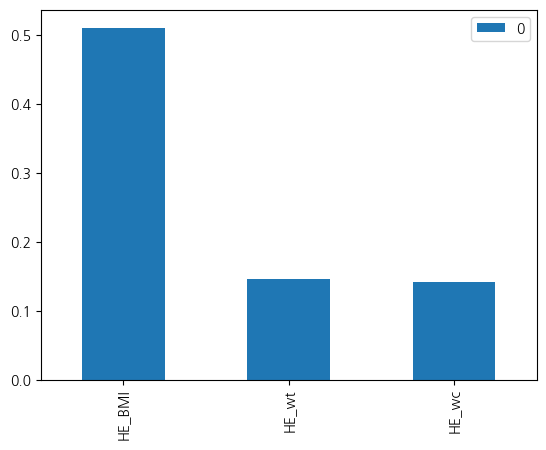

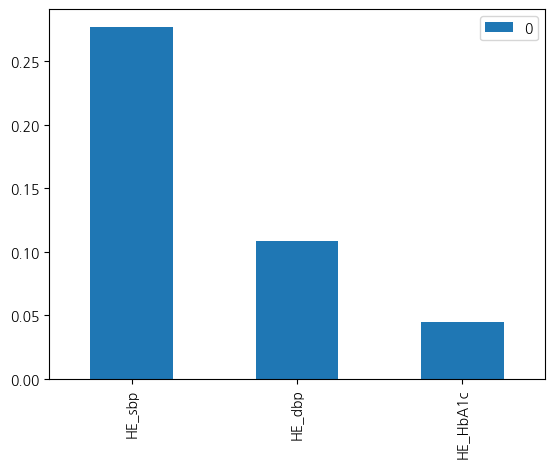

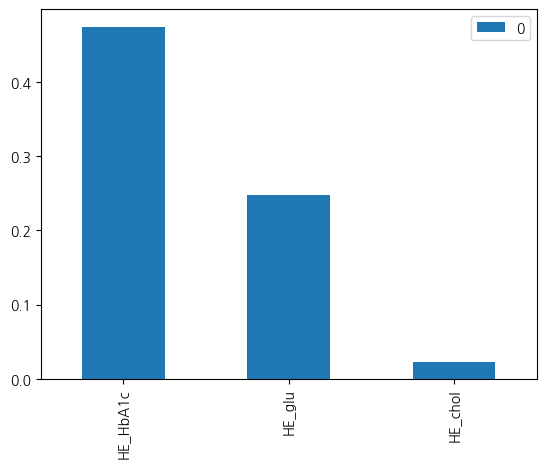

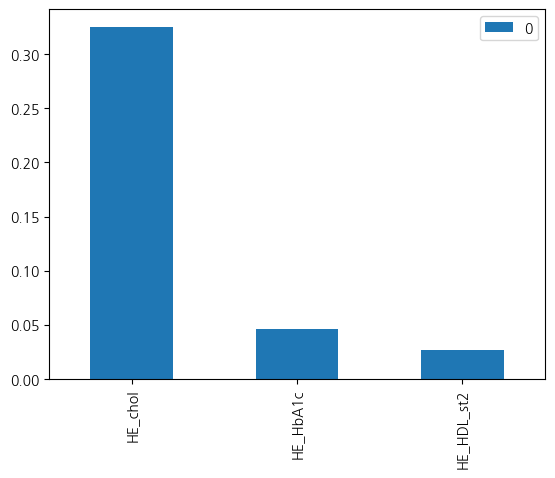

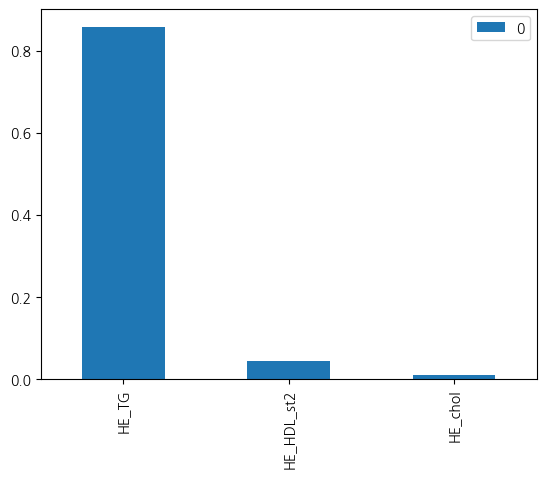

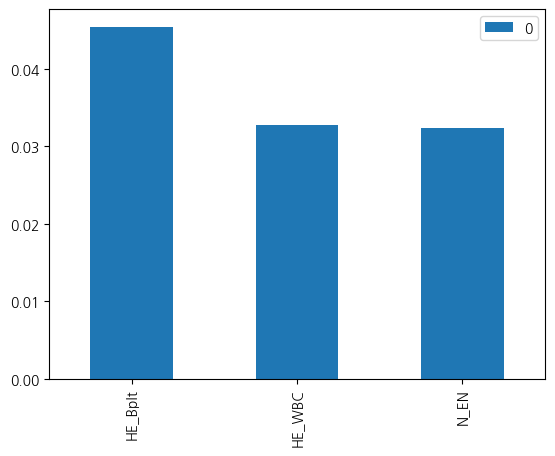

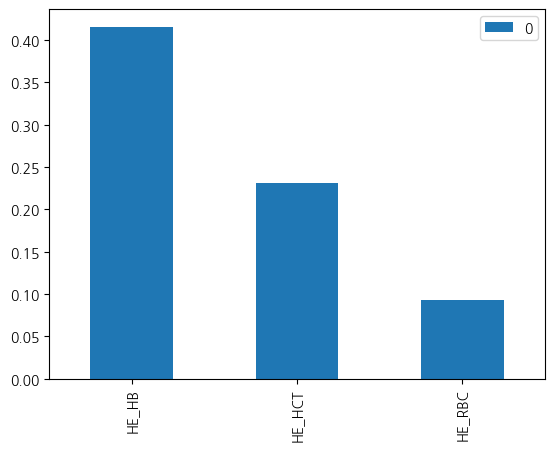

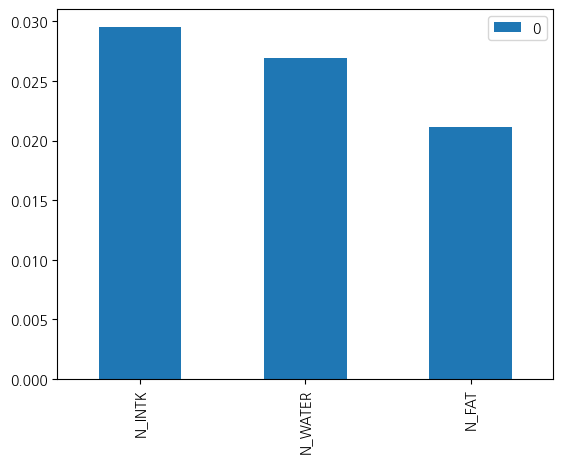

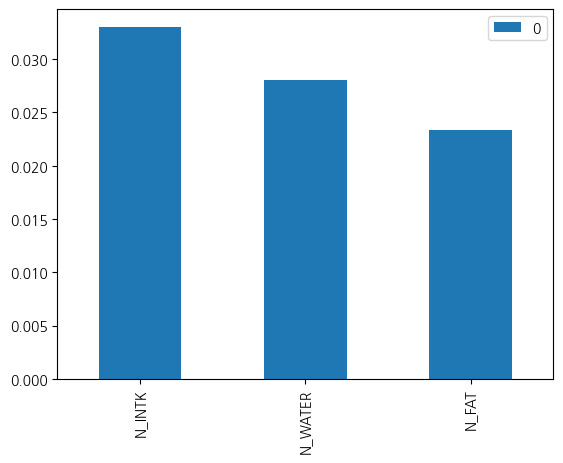

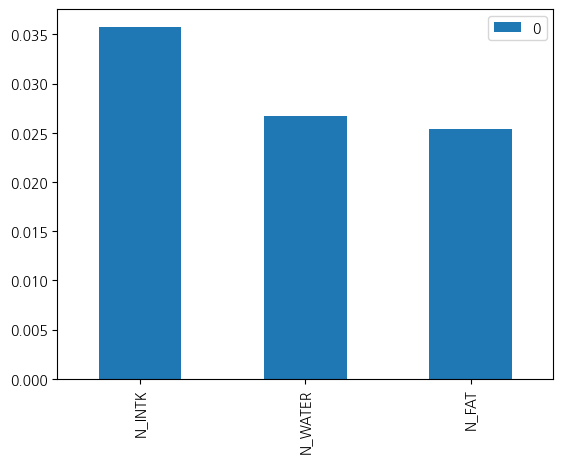

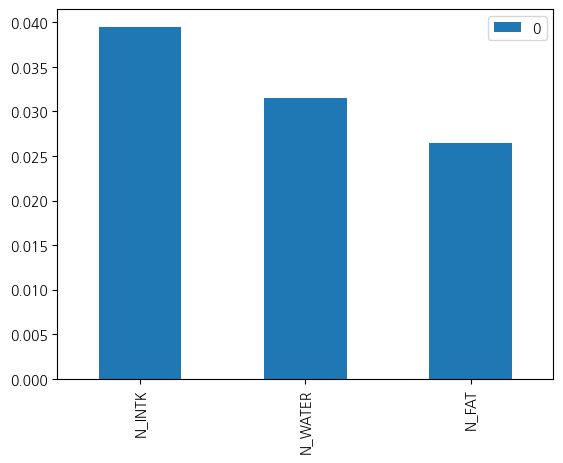

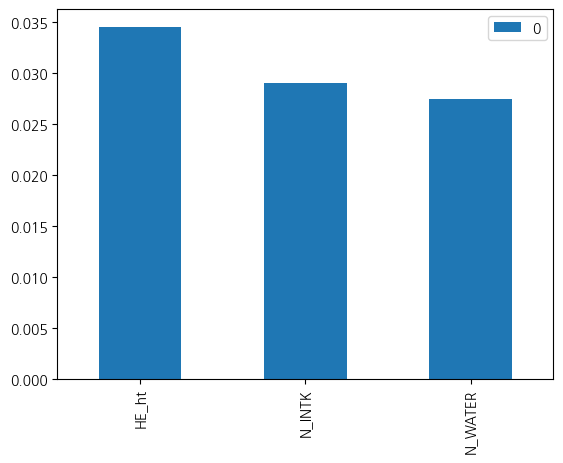

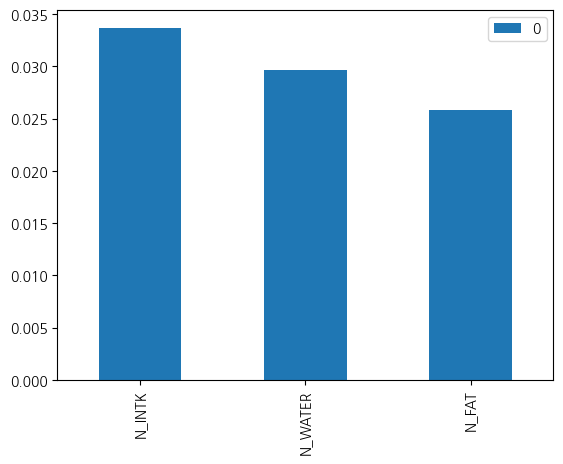

In [74]:
for ii in dic_fe_impo.keys():
    print(ii)
    print(dic_fe_impo[ii][:3])
    dic_fe_impo[ii][:3].plot(kind='bar')
    #print(pd.DataFrame(dic_fe_impo[ii]))
    print('{} = {}'.format(ii,list(dic_fe_impo[ii][:3].index)))

1 : 걸린거
- 데이터프레임 만들기

In [78]:
disease_df = df[target]

In [96]:
disease_df = df[target]

dis_dic = {}
for ii in target :
    dis_dic[ii] = sum(disease_df[ii] == 1) / len(disease_df)

In [97]:
pd.Series(dis_dic)

비만            0.351147
고혈압           0.368043
당뇨병           0.168655
고콜레스테롤혈증      0.236745
고중성지방혈증       0.150159
B형간염          0.033456
빈혈            0.095737
뇌졸중           0.026523
협심증또는심근경색증    0.034887
천식            0.031407
아토피피부염        0.017037
골관절염          0.145977
우울증           0.049819
dtype: float64